In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
from scipy.stats import skew
import statistics

ModuleNotFoundError: No module named 'scipy'

In [2]:
df = pd.read_csv("data_file/study_performance.csv")

In [5]:
df.shape

(1000, 8)

In [7]:
df.count()

gender                         1000
race_ethnicity                 1000
parental_level_of_education    1000
lunch                          1000
test_preparation_course        1000
math_score                     1000
reading_score                  1000
writing_score                  1000
dtype: int64

In [8]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
df[df["gender"] == "female"].gender.count()

518

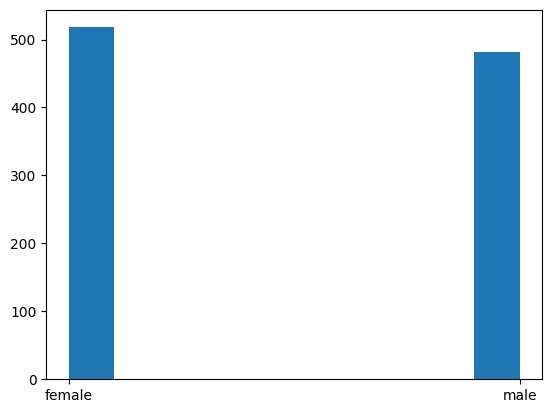

In [17]:
plt.hist(df["gender"])
plt.show()

<Axes: xlabel='math_score', ylabel='Count'>

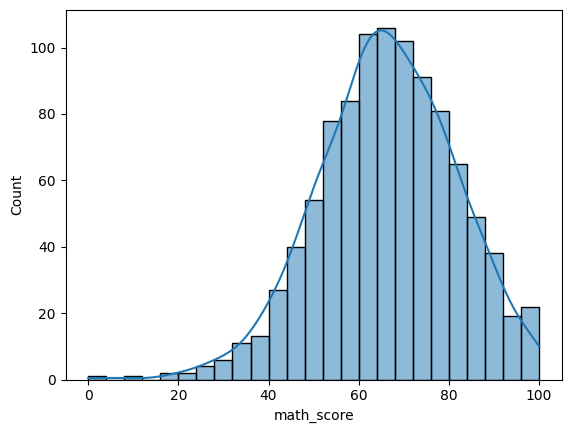

In [19]:
sns.histplot(df["math_score"], kde=True)